# FINITE DIFFERENCE METHOD FOR CONTINUOUS FUNCTION 

# Exercise 1.2

## part (a)

Use the method of undetermined coefficients to set up the $5×5$ Vandermonde system that would determine a fourth-order accurate finite difference approximation to $u''(x)$ based on 5 equally spaced points, 

$$u''(x) = c_{-2}u(x-2h)+c_{-1}u(x-h)+c_0u(x) + c_1u(x+h) +c_2u(x+2h) + O(h^4).$$

Let $\alpha_k = \frac{1}{k!} u^{(k)}(x)$

$u(x-2h)= \alpha_0 - 2\alpha_1 h + 4\alpha_2 h^2 - 8\alpha_3 h^3 + 16\alpha_4 h^4 - 32\alpha_5 h^5$

$u(x-h)= \alpha_0 - \alpha_1 h + \alpha_2 h^2 - \alpha_3 h^3 + \alpha_4 h^4 - \alpha_5 h^5$

$u(x)= \alpha_0 $

$u(x+h)= \alpha_0 + \alpha_1 h + \alpha_2 h^2 + \alpha_3 h^3 + \alpha_4 h^4 + \alpha_5 h^5$

$u(x+2h)= \alpha_0 + 2\alpha_1 h + 4\alpha_2 h^2 + 8\alpha_3 h^3 + 16\alpha_4 h^4 + 32\alpha_5 h^5$

So,

$$D^2u(x) = (c_{-2} + c_{-1} + c_0 + c_1 + c_2)\alpha_0$$

$$ + (-2c_{-2} - c_{-1} + c_1 + 2c_2)\alpha_1$$
         
$$ + (4c_{-2} + c_{-1} + c_1 + 4c_2)\alpha_2$$
         
$$ + (-8c_{-2} - c_{-1} + c_1 + 8c_2)\alpha_3$$
         
$$ + (16c_{-2} + c_{-1} + c_1 + 16c_2)\alpha_4$$
         
$$ + (-32c_{-2} - c_{-1} + c_1 + 32c_2)\alpha_5 + O(h^6)$$
         
         
$c_{-2} + c_{-1} + c_0 + c_1 + c_2=0$

$-2c_{-2} - c_{-1} + c_1 + 2c_2=0$

$4c_{-2} + c_{-1} + c_1 + 4c_2=\frac{2}{h^2}$

$-8c_{-2} - c_{-1} + c_1 + 8c_2=0$

$16c_{-2} + c_{-1} + c_1 + 16c_2=0$


$$
\left(\begin{array}{cc} 
 1 &  1 & 1 & 1 &  1 \\
-2 & -1 & 0 & 1 &  2 \\
 4 &  1 & 0 & 1 &  4 \\
-8 & -1 & 0 & 1 &  8 \\
16 &  1 & 0 & 1 & 16 
\end{array}\right)
\left(\begin{array}{cc} 
c_{-2} \\ 
c_{-1} \\
c_0 \\
c_1 \\
c_2
\end{array}\right) = \frac{1}{h^2}
\left(\begin{array}{cc} 
0 \\ 
0 \\
2 \\
0 \\
0 \\
\end{array}\right)
$$ 

using Printf, LinearAlgebra, Plots

In [3]:
# 5x5 Vandermonde matrix A and vector b
A = [1 1 1 1 1; -2 -1 0 1 2; 4 1 0 1 4; -8 -1 0 1 8; 16 1 0 1 16//1]

5×5 Matrix{Rational{Int64}}:
  1   1  1  1   1
 -2  -1  0  1   2
  4   1  0  1   4
 -8  -1  0  1   8
 16   1  0  1  16

In [3]:
b = [0; 0; 2; 0; 0//1]


5-element Vector{Rational{Int64}}:
 0
 0
 2
 0
 0

In [4]:
# Function to print coefficients using fdcoeffF method
function fdstencil(k, j)
    n = length(j)
    A = [1 1 1 1 1; -2 -1 0 1 2; 4 1 0 1 4; -8 -1 0 1 8; 16 1 0 1 16//1]
    b = [0; 0; 2; 0; 0//1]
    c = A \ b//1  # Solves the system A * c = b

    println("\nComputed Coefficients (c):")
    @printf("%10s %10s\n", "Coeff", "Value")
    println("--------------------------")
    for i in 1:n
        @printf("%10d %10.5f\n", i - 3, c[i])
    end

    return c
end

# Call fdstencil to compute the coefficients
coefficients = fdstencil(2, [-2, -1, 0, 1, 2])



Computed Coefficients (c):
     Coeff      Value
--------------------------
        -2   -0.08333
        -1    1.33333
         0   -2.50000
         1    1.33333
         2   -0.08333


5-element Vector{Rational{Int64}}:
 -1//12
  4//3
 -5//2
  4//3
 -1//12

$$\left(\begin{array}{cc} 
c_{-2} \\ 
c_{-1} \\
c_0 \\
c_1 \\
c_2
\end{array}\right) =
\left(\begin{array}{cc} 
\frac{-1}{12} \\ 
\frac{4}{3} \\
\frac{-5}{2} \\
\frac{4}{3} \\
\frac{-1}{12}
\end{array}\right)
$$

In [1]:
[-1//12, 4//3, -5//2, 4//3, -1//12]' * [-32, -1, 0, 1, 32//1]

0//1

In [2]:
[-1//12, 4//3, -5//2, 4//3, -1//12]' * [64, 1, 0, 1, 64//1]

-8//1

$$D^2u(x) = \frac{1}{h^2}(\frac{-1}{12}u(x-2h) + \frac{4}{3}u(x-h) + \frac{-5}{2}u(x) + \frac{4}{3}u(x+h) + \frac{-1}{12}u(x+2h))$$

From above calculation, the error is:

$$D^2u(x)-u''(x) = \frac{-8}{6!}\frac{h^6}{h^2}u^{(6)}(x) + O(h^5)$$

$$ = \frac{-8}{720} h^4 u^{(6)}(x) + O(h^5)$$

$$ = \frac{-1}{90} h^4 u^{(6)}(x) + O(h^5)$$

$D^2u(x)$ is a fourth-order accurate finite difference approximation to $u''(x)$ with approximate error $\frac{-1}{90} h^4 u^{(6)}(x) + O(h^5)$

## part (b) 

Compute the coefficients using the matlab code fdstencil.m available from the website, and check that they satisfy the system you determined in part (a).

In [5]:
using Printf, LinearAlgebra, Plots

In [6]:
# 5x5 Vandermonde matrix
function vMatrix()
    A = [1 1 1 1 1; -2 -1 0 1 2; 4 1 0 1 4; -8 -1 0 1 8; 16 1 0 1 16]
    b = [0; 0; 2; 0; 0]
    c = A \ b  # Solve for coefficients
    for i in 1:length(c)
        @printf("%10d %10.5f\n", i - 3, c[i])
    end
    return c
end

# Computing finite difference coefficients
coefficients = vMatrix()

# Function u(x) = sin(2x) and exact second derivative
u(x) = sin(2 * x)
upp(x) = -4 * sin(2 * x)

# spaced values of h
hvals = exp10.(range(-1, stop=-4, length=13))

# errors for different values of h
errors = [abs(sum(coefficients .* u.(1 .+ h * [-2, -1, 0, 1, 2]))/h^2 - upp(1.0)) for h in hvals]





        -2   -0.08333
        -1    1.33333
         0   -2.50000
         1    1.33333
         2   -0.08333


13-element Vector{Float64}:
 6.443064817762689e-5
 6.458816553589486e-6
 6.463801960343574e-7
 6.465288482360165e-8
 6.4630221174866165e-9
 6.375318051254908e-10
 5.203970587785989e-11
 3.9181546895861175e-11
 2.810276455988969e-10
 4.824238786227397e-10
 2.1128951921411954e-9
 2.896122452966665e-9
 3.3754251838047367e-8

In [9]:

# table comparing h, actual error, and predicted error
@printf("%6s %15s %20s\n", "h", "Error", "Predicted Error")
@printf("%s\n", "-"^45)

for h in hvals
    # Calculating the approximation for the second derivative (upp)
    finite_diff_upp = sum(coefficients .* u.(1 .+ h * [-2, -1, 0, 1, 2]))/h^2  # Approximation of u''(1)
    
    # Actual error for the second derivative approximation
    error_upp = abs(finite_diff_upp - upp(1.0))  # Exact second derivative at x = 1.0 is upp(1)

    # Predicted error for current h (second-order method, h^2 scaling)
    predicted_error = h^2

    # Print h, the actual error for u'', and the predicted error (h^2)
    @printf("%6.1e %15.5e %20.5e\n", h, error_upp, predicted_error)
end

print()


     h           Error      Predicted Error
---------------------------------------------
1.0e-01     6.44306e-05          1.00000e-02
5.6e-02     6.45882e-06          3.16228e-03
3.2e-02     6.46380e-07          1.00000e-03
1.8e-02     6.46529e-08          3.16228e-04
1.0e-02     6.46302e-09          1.00000e-04
5.6e-03     6.37532e-10          3.16228e-05
3.2e-03     5.20397e-11          1.00000e-05
1.8e-03     3.91815e-11          3.16228e-06
1.0e-03     2.81028e-10          1.00000e-06
5.6e-04     4.82424e-10          3.16228e-07
3.2e-04     2.11290e-09          1.00000e-07
1.8e-04     2.89612e-09          3.16228e-08
1.0e-04     3.37543e-08          1.00000e-08


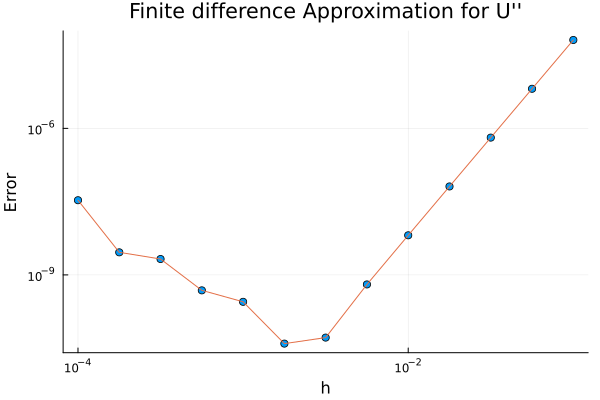

In [11]:
# Ploting error vs h on log-log scale
scatter(hvals, errors, xscale=:log10, yscale=:log10, xlabel="h", ylabel="Error", title="Finite difference Approximation for U''", legend=false, markersize=4)
plot!(hvals, errors, line=:solid)